### Dataset Introduction
- Dataset Name

`Sales Performance Dataset`

- Dataset Description

This dataset contains transactional sales data including order details, product categories, customer segments, regions, discounts, sales, and profit information. The data represents historical sales performance across different regions and product categories.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
#Load Dataset
df = pd.read_csv('Sample_Superstore.csv',encoding = 'latin1')

In [ ]:
#Show top records
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
#Columns in table
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
#To drop unwanted columns
df.drop(['Row ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','City','Postal Code','Product ID'],axis =1,inplace=True)

In [ ]:
#Removes unwanted columns
df.columns

Index(['Order ID', 'Order Date', 'Country', 'State', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
#To show the diamensions of the dataset
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#To find null values in dataset
df.isnull().sum()

Order ID        0
Order Date      0
Country         0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
df.head()

,Order ID,Order Date,Country,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,United States,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,United States,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,United States,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,United States,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,United States,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#To make copy of the dataset
df_copy = df.copy()

In [ ]:
#Chanfe datatype of order date into the datetime
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])

In [ ]:
#To split order date into day,month,year
df_copy['Order day'] = df_copy['Order Date'].dt.day
df_copy['Order month'] = df_copy['Order Date'].dt.month
df_copy['Order year'] = df_copy['Order Date'].dt.year

In [20]:
df_copy.head()

,Order ID,Order Date,Country,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order day,Order month,Order year
0,CA-2016-152156,2016-11-08,United States,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,8,11,2016
1,CA-2016-152156,2016-11-08,United States,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8,11,2016
2,CA-2016-138688,2016-06-12,United States,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,12,6,2016
3,US-2015-108966,2015-10-11,United States,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,11,10,2015
4,US-2015-108966,2015-10-11,United States,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11,10,2015


In [ ]:
#Drop order date columns
df_copy.drop('Order Date',axis=1,inplace = True)

In [25]:
df_copy.head()

,Order ID,Country,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order day,Order month,Order year
0,CA-2016-152156,United States,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,8,11,2016
1,CA-2016-152156,United States,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8,11,2016
2,CA-2016-138688,United States,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,12,6,2016
3,US-2015-108966,United States,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,11,10,2015
4,US-2015-108966,United States,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11,10,2015


## EDA

In [ ]:
# to find duplicates values
df_copy.duplicated().sum()

np.int64(1)

In [ ]:
#To drop the duplicate values
df_copy.drop_duplicates(keep = 'first',inplace = True)

In [ ]:
#To check duplicate values
df_copy.duplicated().sum()

np.int64(0)

In [ ]:
#To identify the numeric and categorical columns in table
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype !='O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype =='O']

In [70]:
print("Numeric features =",numeric_features)
print("Categorical features =",categorical_features)


Numeric features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Order day', 'Order month', 'Order year']
Categorical features = ['Order ID', 'Country', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name']


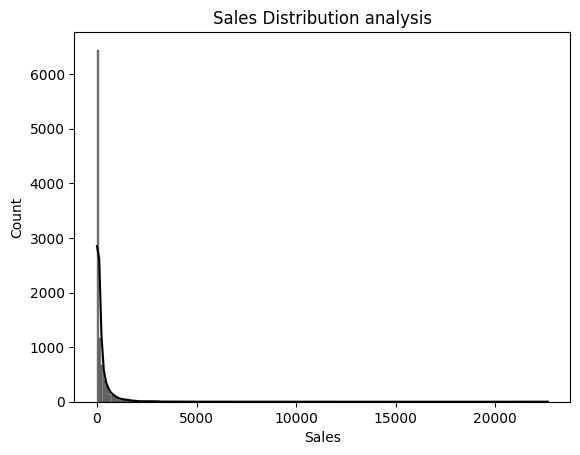

In [159]:

 sns.histplot(df['Sales'],kde = True,color = 'Black')
 plt.title('Sales Distribution analysis')
 plt.show()

### Observation
- Sales Distribution is right skewed
- Majority of orders have low to medium sales
### Insight
- Most transaction are small-value,with few high-value orders driving total revenue

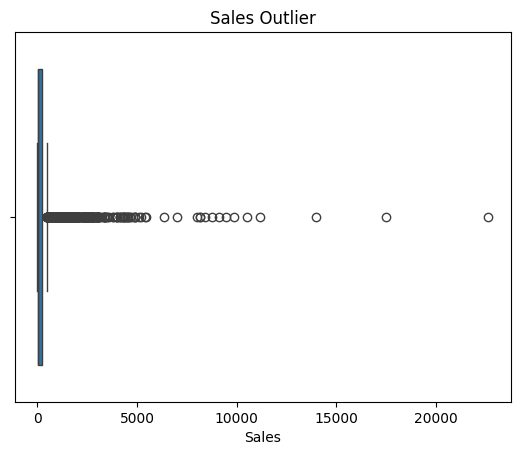

In [88]:
sns.boxplot(x = df_copy['Sales'])
plt.title('Sales Outlier')
plt.show()

### Observation
- Extreme high Sales values are represent
- Most of the sales values are between 0 to 5000

### Insight
- Outliers represents bulk or enterprise-level orders

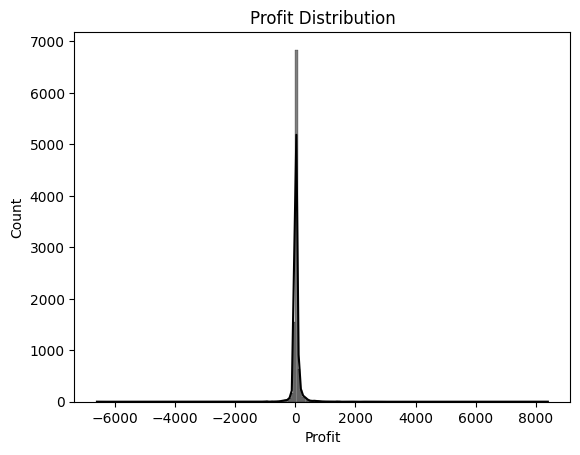

In [87]:
sns.histplot(df_copy['Profit'],kde = True,color = 'black')
plt.title('Profit Distribution')
plt.show()

### Observation
- profit contain both positive and negative values

### Insight
- The business experiences losses in certain transactions, indicating discount or cost issues.

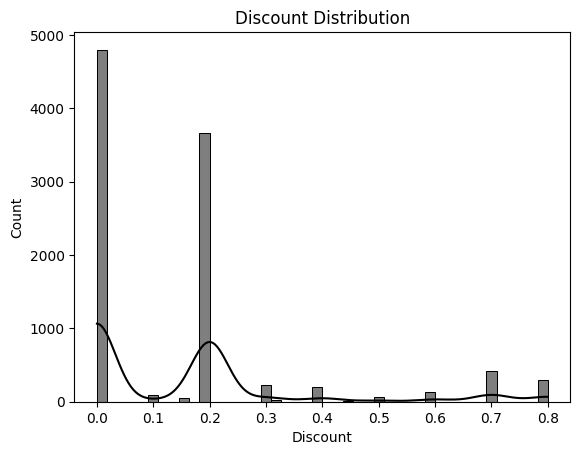

In [86]:
sns.histplot(df_copy['Discount'],kde = True,color = 'Black')
plt.title('Discount Distribution')
plt.show()

### Observation
   - most of the discount values are less than 30%

### Insight
- High discounts are less frequent but may have significant impact on profitability
   

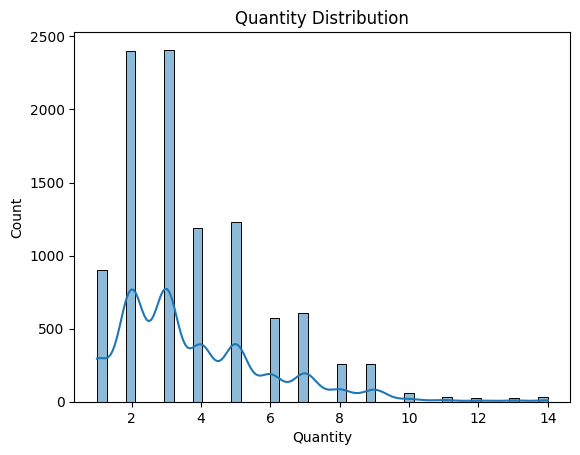

In [85]:
sns.histplot(df_copy['Quantity'],kde = True)
plt.title('Quantity Distribution')
plt.show()

### Observation
- Quantity is concentrated at lower values

### Insight
- Customers usually buy in small quantities, suggesting retail-focused sales.

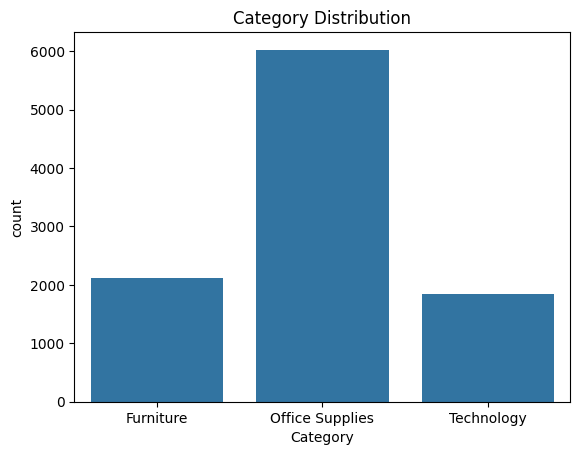

In [155]:
sns.countplot(x = 'Category',data=df_copy)
plt.title('Category Distribution')
plt.show()

### Insight
- The count plot shows office supplies has the highest count - most frequently sold/ordered category
- Furniture and Technology hav lower counts compared to office supplies

## Bivariate Analysis

In [109]:
df.head(2)

,Order ID,Country,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,United States,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,United States,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


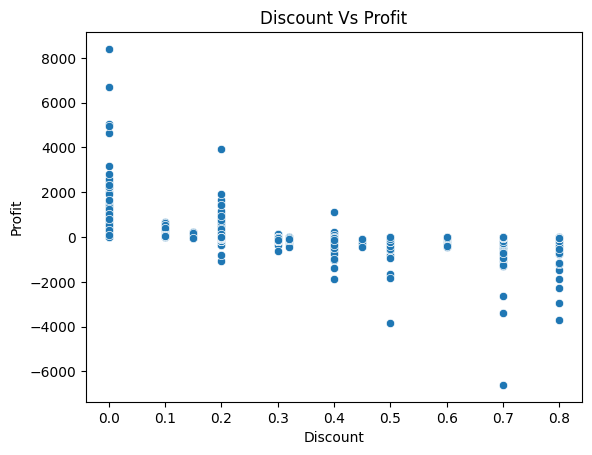

In [154]:
sns.scatterplot(x = 'Discount',y = 'Profit',data = df_copy)
plt.title('Discount Vs Profit')
plt.show()

### Observation 
- As discount increases,profit decreses
- high discount show result in negative profit
### Insight
- Higher discounts significantly reduce profitability, indicating inefficient discount strategies.

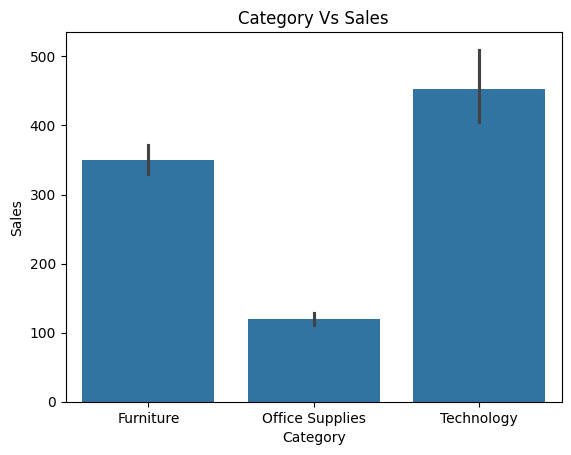

In [113]:
sns.barplot(x = 'Category',y = 'Sales',data = df_copy)
plt.title('Category Vs Sales')
plt.show()

### Observation
 - Tenchnology category shows highest Average sale
 - Furniture category shows low average sales as compare to Technology category
 - Office supplies category shows lowest sale as comparer to furniture category

 ### Insight
 - Technology Category drive most of the revenue and should be prioritized

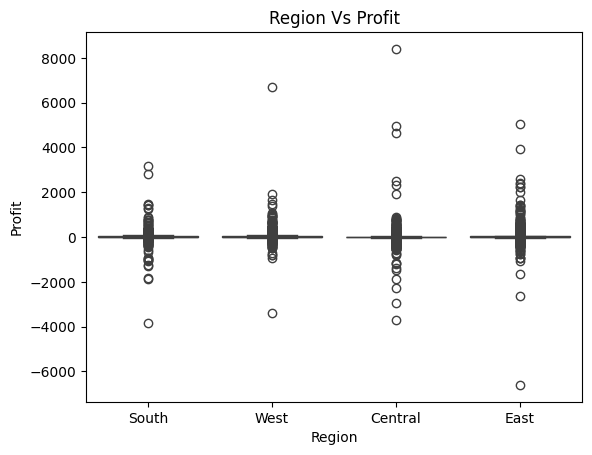

In [118]:
sns.boxplot(x = 'Region',y = 'Profit',data = df_copy)
plt.title('Region Vs Profit')
plt.show()

### Observation
- West region has higher median profit.
- others region shows large negative outliers

### Insights
- Profitability varies across region, requiring region-specific strategies

## Trivariate Analysis

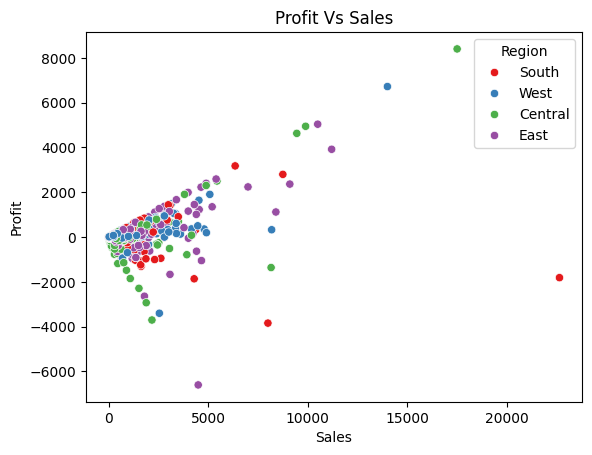

In [163]:
sns.scatterplot(x = 'Sales',y = 'Profit',hue = 'Region',data = df_copy,palette = 'Set1')
plt.title('Profit Vs Sales')
plt.show()

### Observation
- High sales do not always mean high profit in all regions.
### Insight
- Revenue growth does not guarantee profitability across all regions.

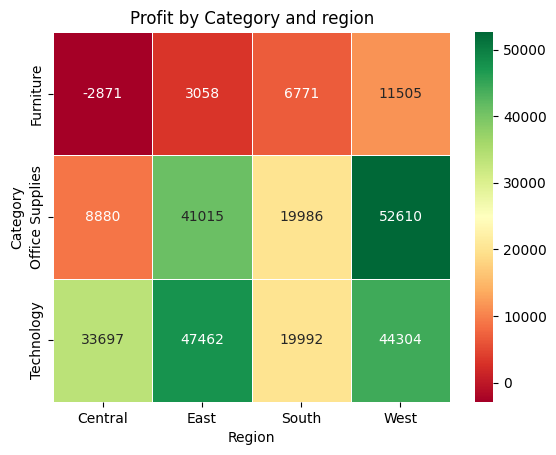

In [138]:
pivot = df_copy.pivot_table(
    values = 'Profit',
    index = 'Category',
    columns = 'Region',
    aggfunc = 'sum'
)
pivot

sns.heatmap(pivot,annot=True,fmt = ".0f",cmap = "RdYlGn",linewidths=0.5)
plt.title('Profit by Category and region')
plt.show()


### Observation

- Technology is profitable across most regions.

- Furniture losses are concentrated in specific regions.

### Insight

- Category–region interaction strongly affects profitability.

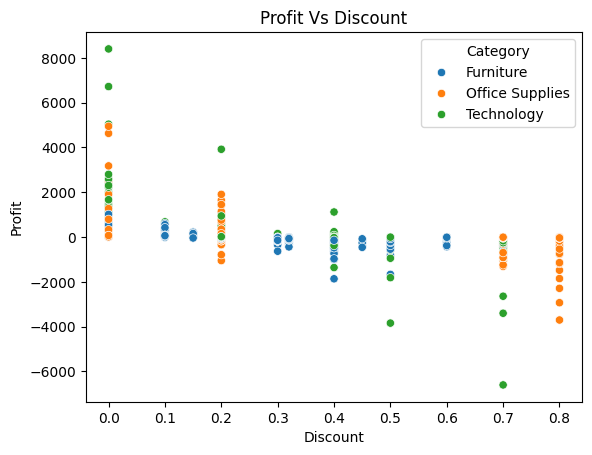

In [164]:
sns.scatterplot(x = 'Discount',y = 'Profit',hue = 'Category',data = df_copy)
plt.title('Profit Vs Discount')
plt.show()

### Observation

- Furniture category shows losses at high discounts.

- Technology handles discounts better.

### Insight

- Discount impact differs by category; Furniture is more sensitive to discounts.

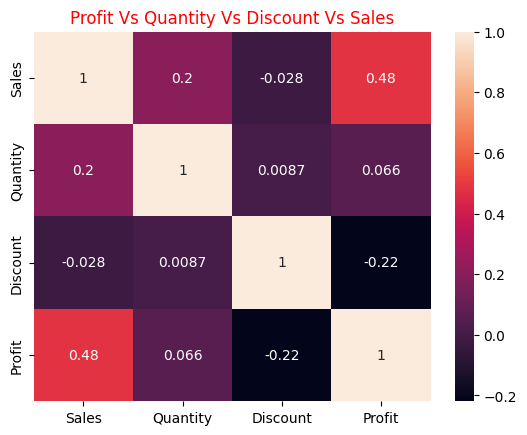

In [166]:
cols = df_copy[['Sales','Quantity','Discount','Profit']]
corr = cols.corr()
sns.heatmap(corr,annot = True)
plt.title('Profit Vs Quantity Vs Discount Vs Sales',color = 'r')
plt.show()

### Observation
- Sales & Profit :- It show the moderate positive corelation - means higher sales generally mean higher profit
- Discount & Profit :- Negative corerelation - more discount reduces profit.
- Quantity & Sales :- weak positive correlation. - selling more items slightly increases sales.
- Quantity & Profit :- very weak positive - quantity alone doesn't strongly impact profit.
- Discount & Sales :- Weak negative - discount don't significantly increase sales.

### Insights
- Profit depends more on sales value than quantity, and high discounts hurt Profitibility.

### Exploratory Data analysis final conclusion
- Univariate Analysis :- revealed that sales and profit distributions are right-skewed. with a small number of high value transaction contributing significantly to overall revenue.
Discount distribution highlight the most of the discounts are less than 30 some discounts are high so it may impact on profitability.
Quantity distributinon it shows the customer buy products most of the in small quantities so it suggesting retail-focused sales.
- Bivariate Analysis :- it identified a strong negative relationship between discount and profit.it shows the higher discount often lead to reduced profitability.
The relationship between Region and profit it highlighted west region as the strongest performer,consistently generating higher sales and profit compared to other region.
The relationship between category and sales most of the sales category have Technology so the Technology category drive most of the revenue also office supplies category sales less.
- Trivariate Analysis :- In this analysis using pivot tables and visualizations demonstrated that profit performance varies significantly across category region combinations.The technology category it shows across all region.while furniture echibits losses in specific regions,especially at higher discount levels